___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Проверочный проект по моделям машинного обучения с учителем (supervised learning) - Методы на основе деревьев



## Этот проверочный проект можно выполнять тремя разными способами - мы обсуждаем это в видео-лекции с обзором проверочных заданий!

----

**Проверочный проект можно выполнять одним из трёх способов:**
   1. Открыть новый блокнот Jupyter Notebook, загрузить данные из файла - и далее самостоятельно выполнить анализ и визуализацию данных, а также создать предиктивную модель.
   2. Использовать блокнот с заданиями как общее руководство к действию, выполняя задания, написанные жирным шрифтом.
   3. Сразу перейти к блокноту с решениями и видео-лекциям с решениями, и параллельно с просмотром лекций выполнять эти задания в своём блокноте.

------
------

## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----
----


## Выполните задания ниже, обозначенные жирным шрифтом!

## Часть 0: Импортируем библиотеки и загружаем данные

**Задание: Запустите уже готовые ячейки ниже, чтобы импортировать библиотеки и загрузить данные из файла в датафрейм. Файл называется "Telco-Customer-Churn.csv"**

In [1]:
# Запустите эти ячейки для начала выполнения проекта!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## Часть 1: Общие характеристики данных

**Задание: С помощью метода .info() проверьте типы данных для колонок, а также есть ли отсутствующие значения в Вашем датафрейме.**

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Задание: Выведите статистические метрики для числовых колонок с помощью .describe(). Вы увидите, что большинство колонок являются категориальными, поэтому Вам позднее нужно будет создать для них дамми-переменные.**

In [273]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Задание: Проверьте, что в этих данных нет отсутствующих значений - для этого выведите количество значений NaN отдельно для каждой колонки.**

In [275]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Задание: Постройте график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

<Axes: xlabel='Churn', ylabel='count'>

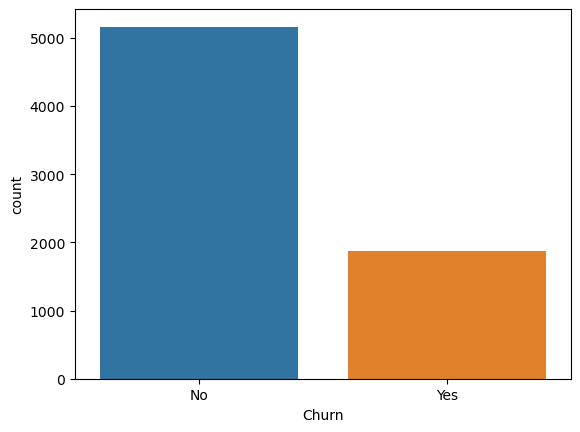

In [277]:
sns.countplot(data=df, x='Churn', hue='Churn')

**Задание: Исследуйте распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

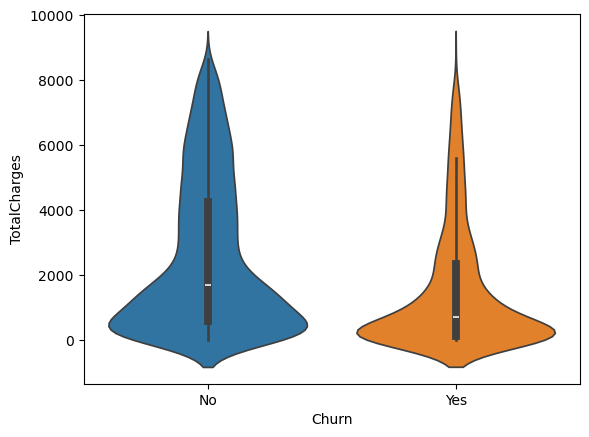

In [279]:
sns.violinplot(data=df, x='Churn' ,y='TotalCharges', hue='Churn')

**Задание: Постройте график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавьте раскраску цветами по колонке Churn.**

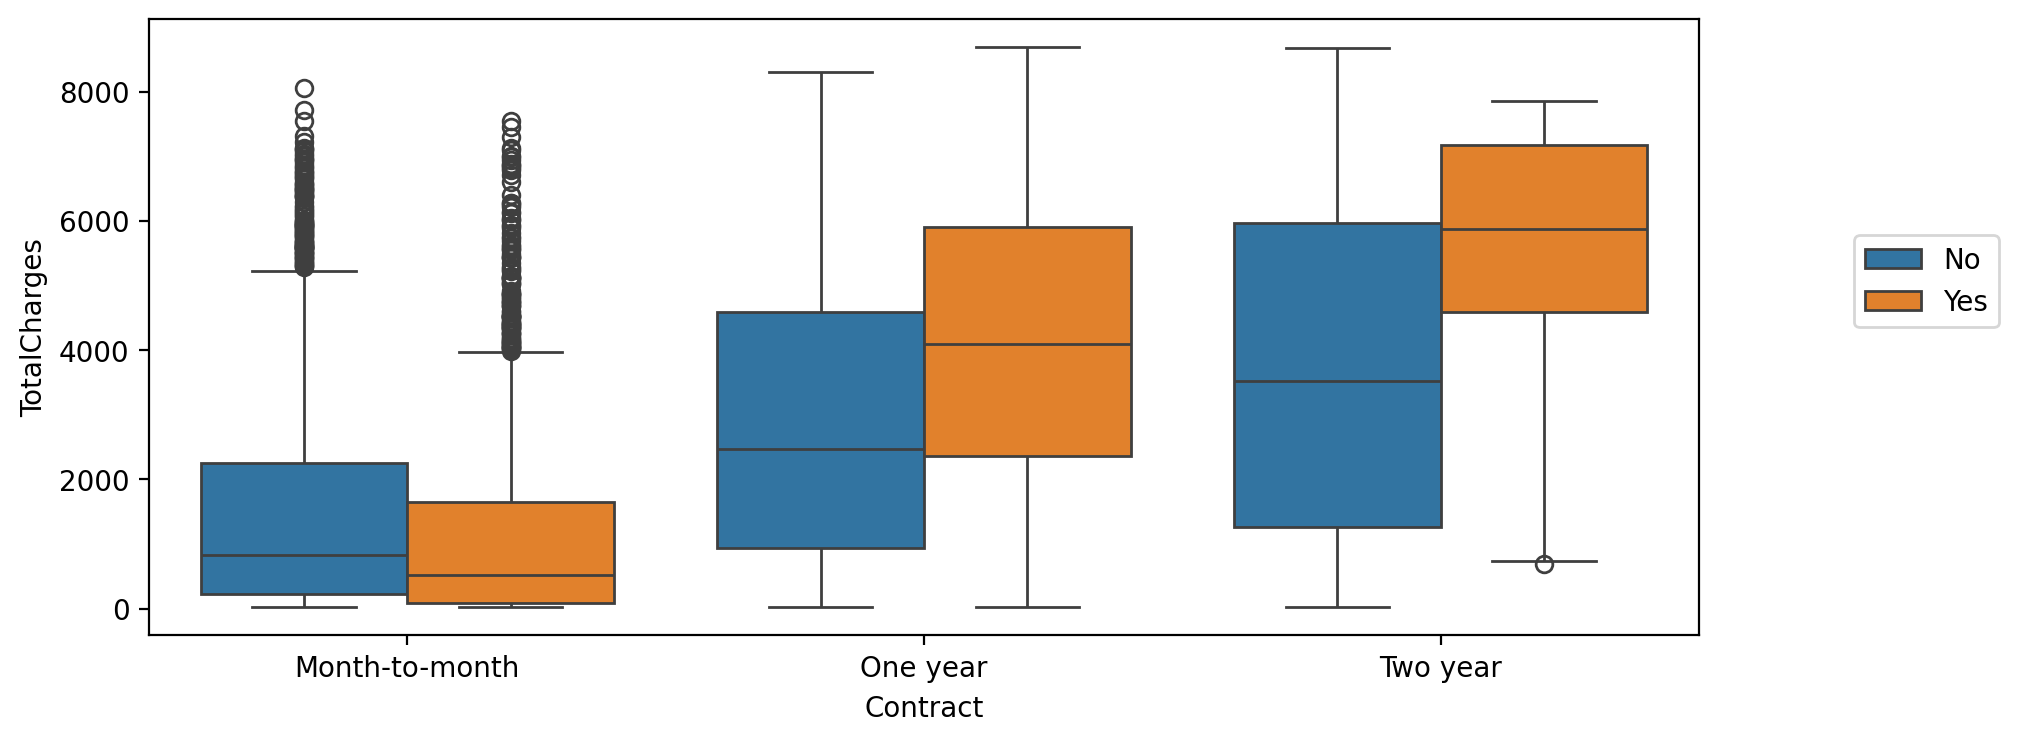

In [281]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

**Задание: Постройте график barplot с корреляции указанных ниже признаков с целевой переменной. Обратите внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Мы специально привели список признаков, чтобы не проверять все признаки. Дело в том, что некоторые признаки имеют слишком много уникальных значений для такого анализа, например колонка customerID.***

In [301]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()


In [303]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

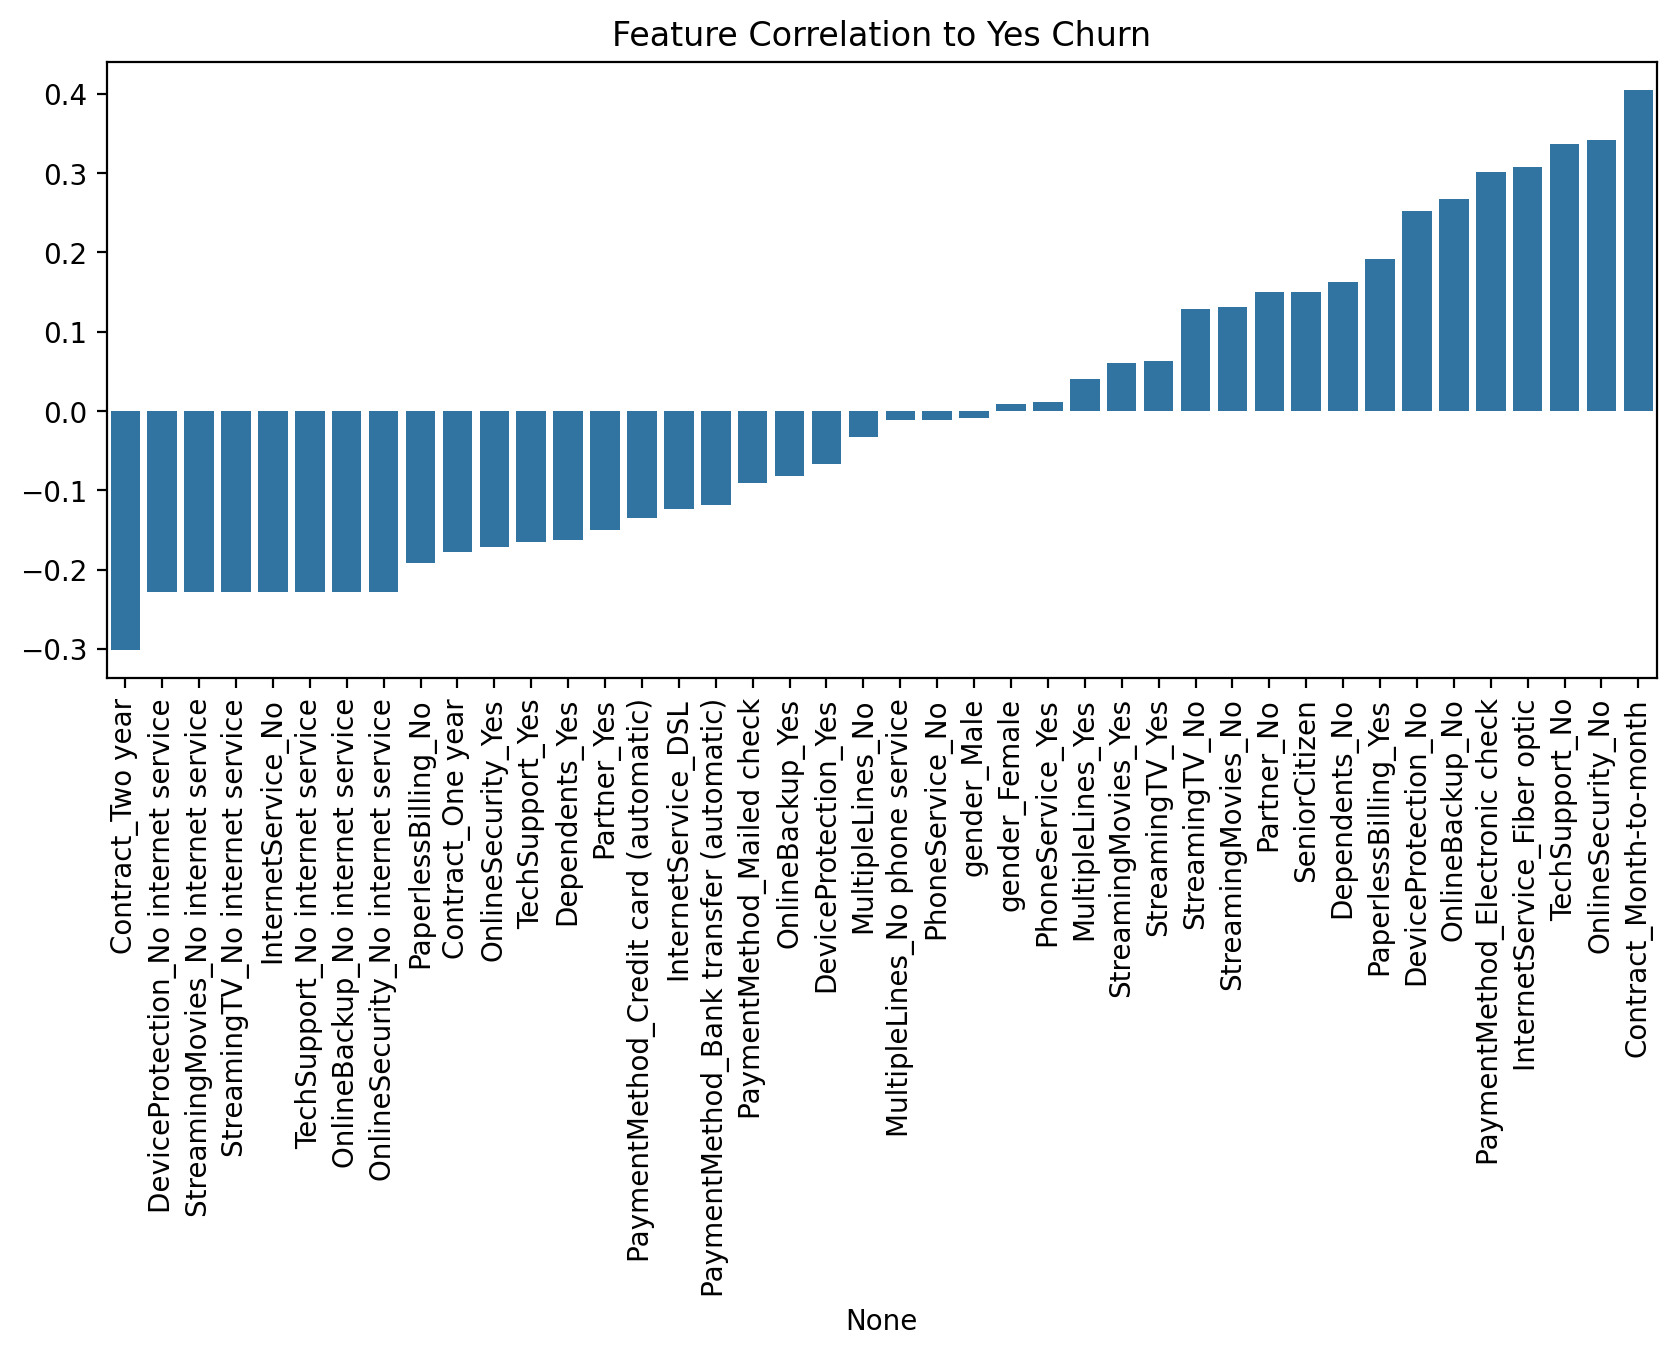

In [305]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Задание: Перечислите 3 типа контракта (колонка Contract).**

In [307]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Задание: Создайте гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

<Axes: xlabel='tenure', ylabel='Count'>

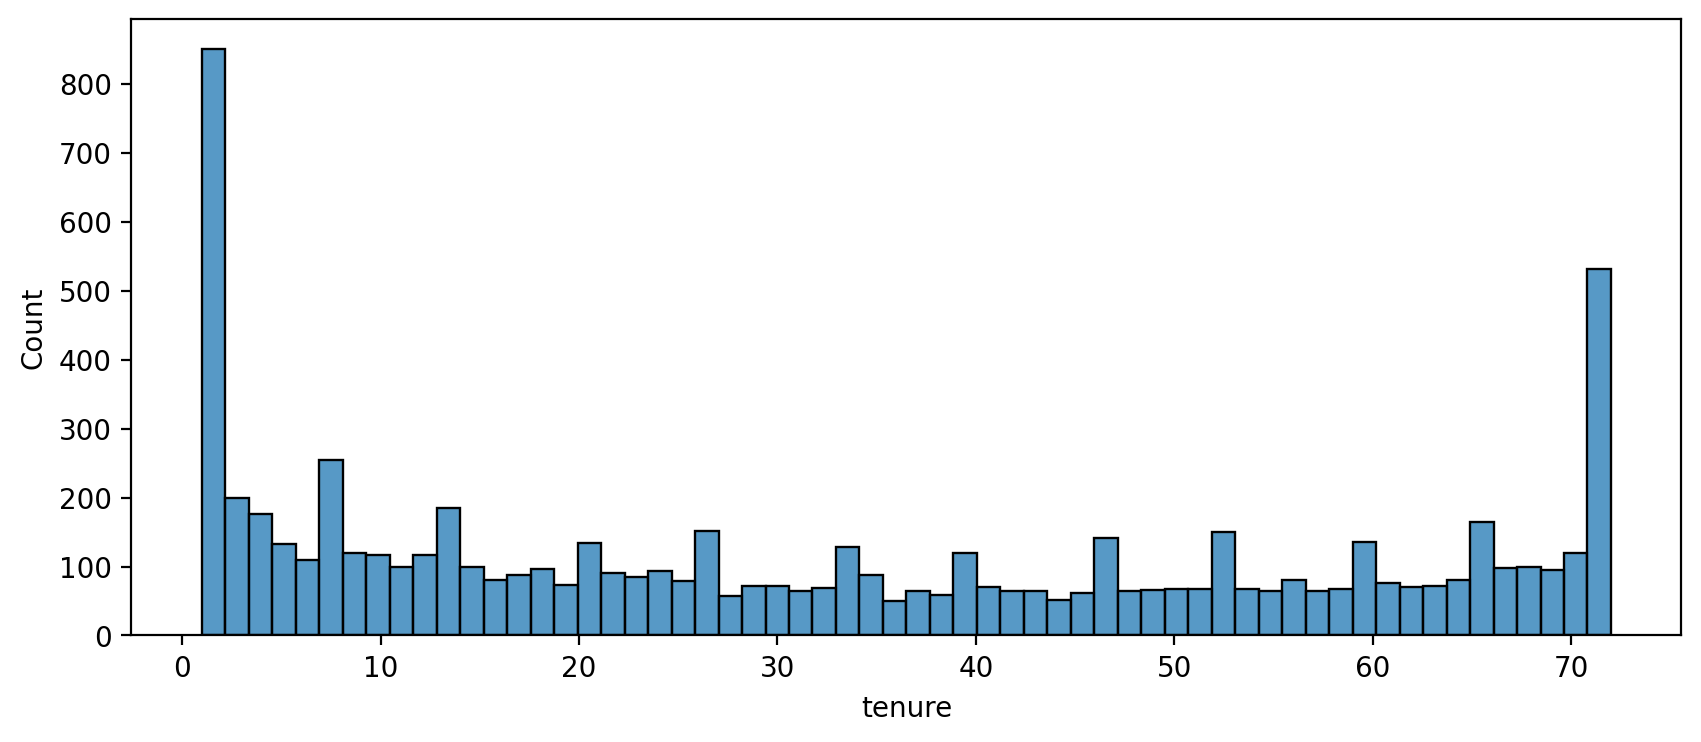

In [309]:
plt.figure(figsize=(10, 4), dpi=200)
sns.histplot(data=df, x='tenure', bins=60)

**Задание: Постройте гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract. Посмотрите документацию по seaborn или блокноты для раздела про seaborn, чтобы вспомнить, как это делается.**

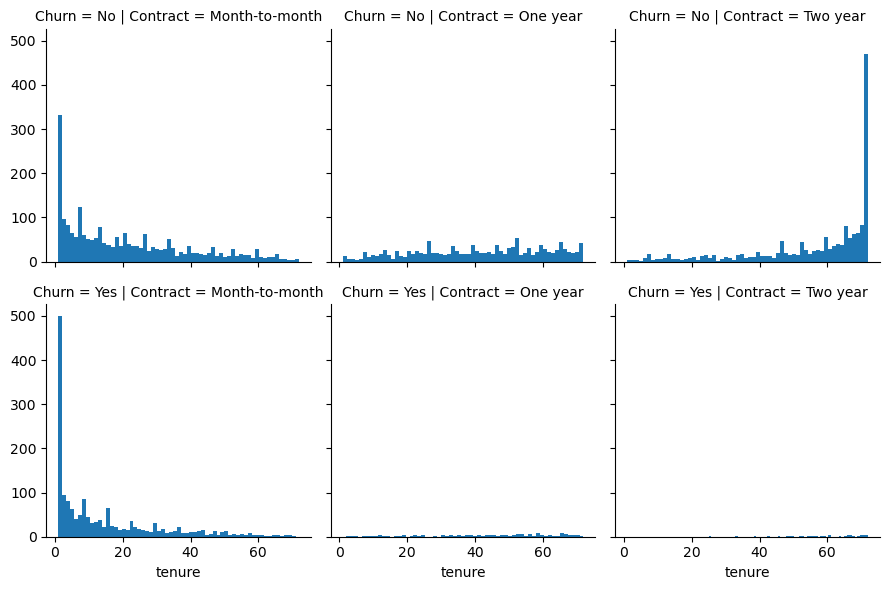

In [311]:
g = sns.FacetGrid(data=df, row='Churn', col='Contract')
g.map(plt.hist, 'tenure', bins=60)

**Задание: Постройте график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

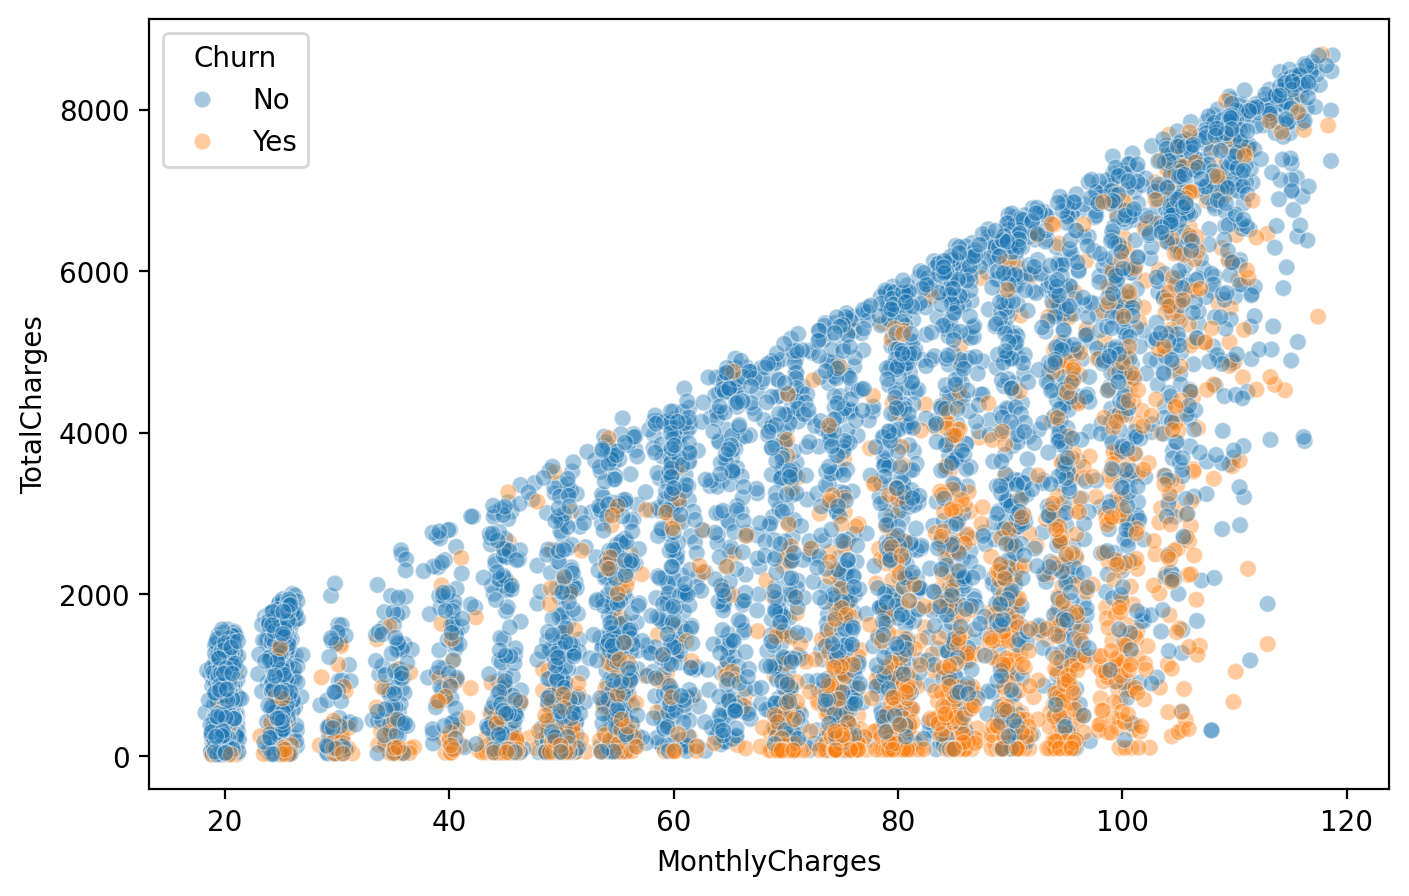

In [313]:
plt.figure(figsize=(8,5), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.4)

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Задание: Для каждого уникального значения колонки tenure в качестве когорты, вычислите процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислите такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [315]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [317]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [319]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Задание: Используя результаты предыдущего задания, постройте график процента оттока для различных значений tenure.**

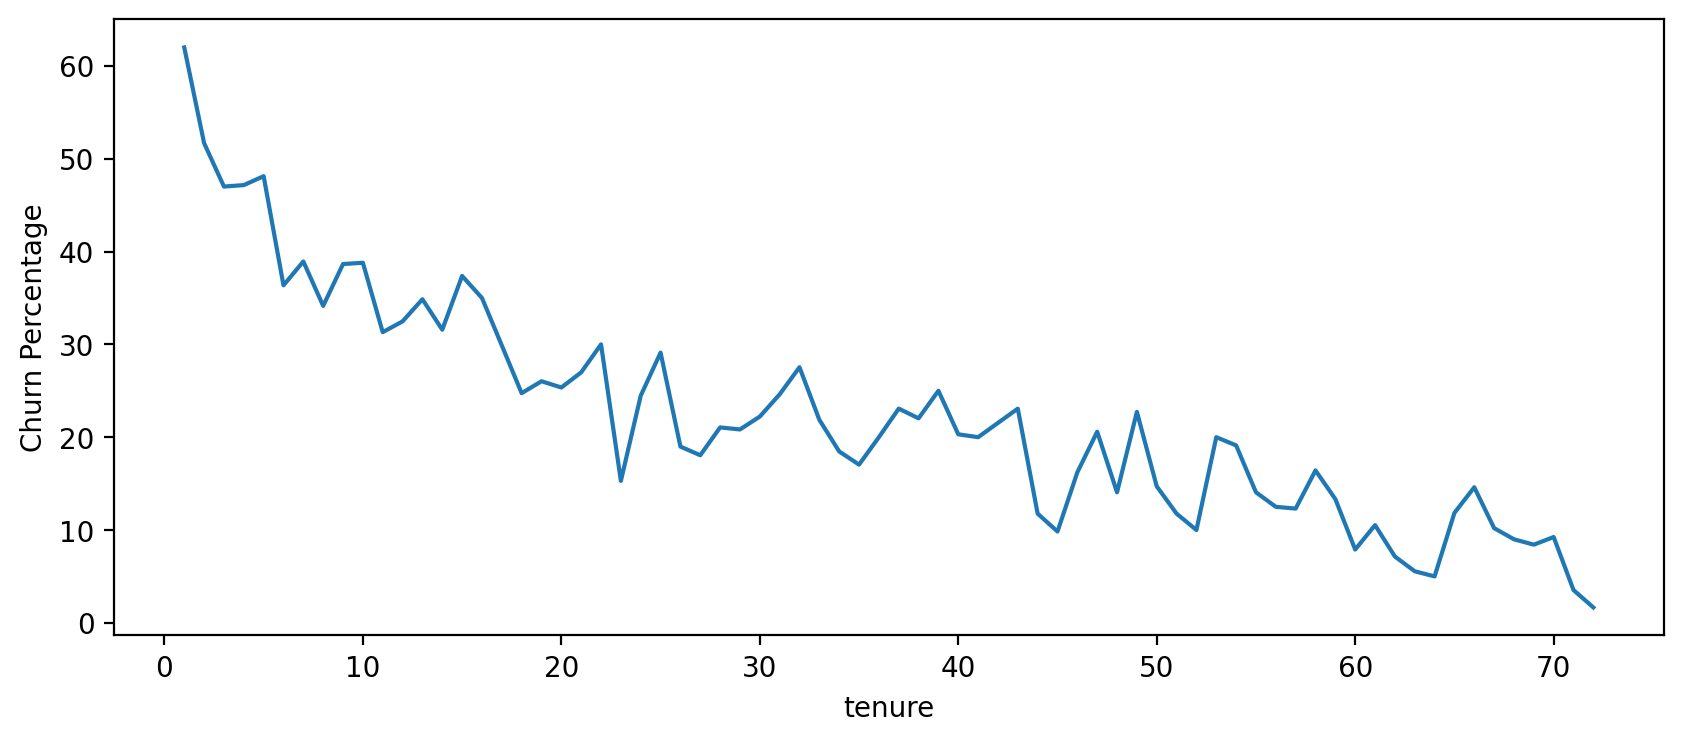

In [325]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Более крупные когорты (сегменты)
**Задание: На основе колонки tenure создайте новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [327]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [329]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [331]:
df.head(10)[['tenure','Tenure Cohort']]

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

**Задание: Постройте график scatterplot для Total Charges и Monthly Charges, раскрашивая график разными цветами по колонке "Tenure Cohort", которую Вы создали в предыдущем задании.**

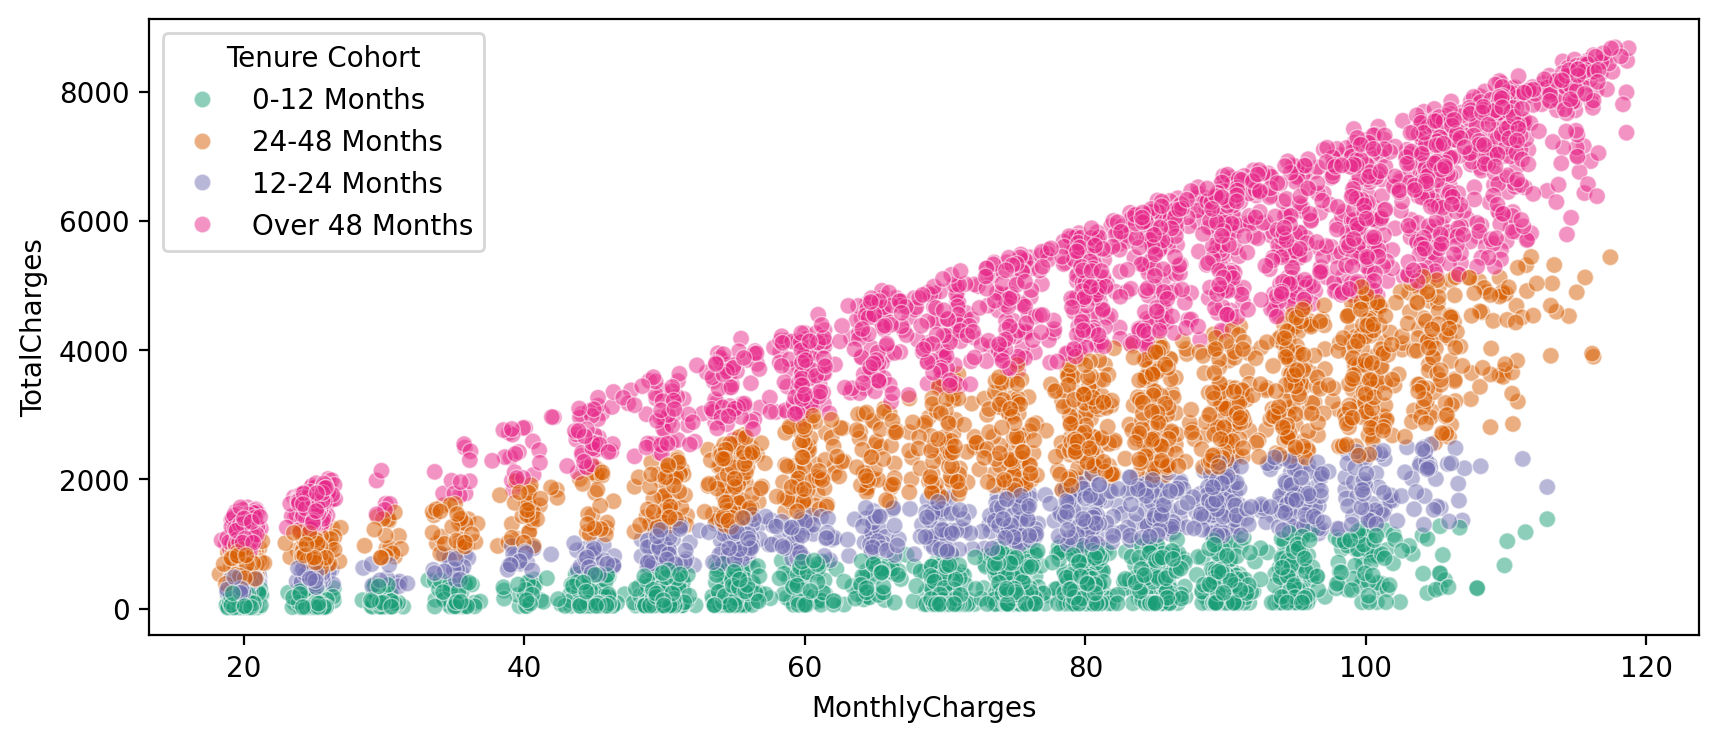

In [335]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2');

**Задание: Постройте график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

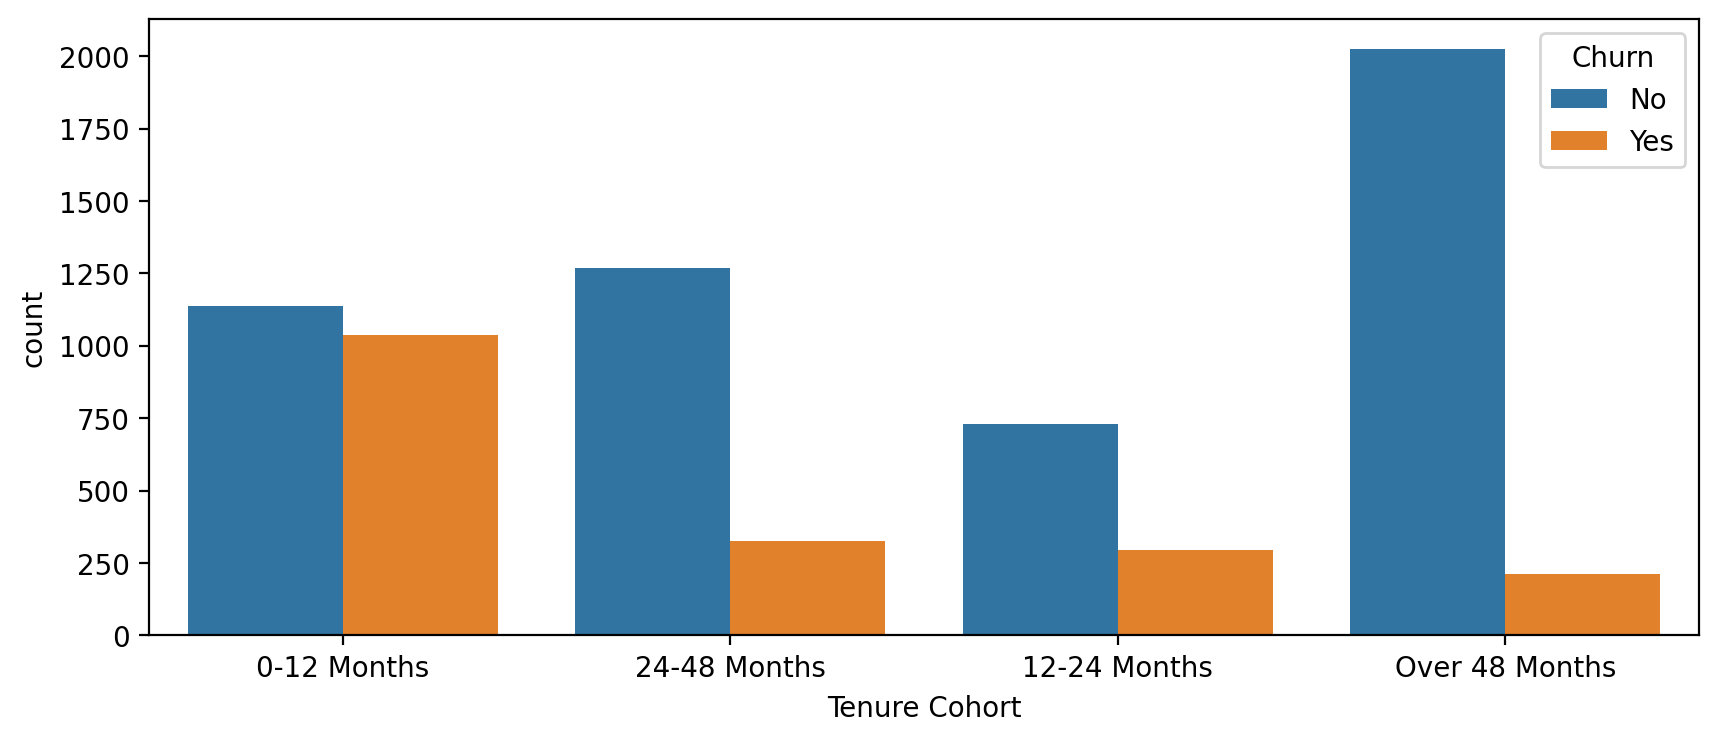

In [339]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

**Задание: Создайте набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создайте отдельный график, и раскрасьте эти графики разными цветами по колонке Churn.**

<Figure size 2000x800 with 0 Axes>

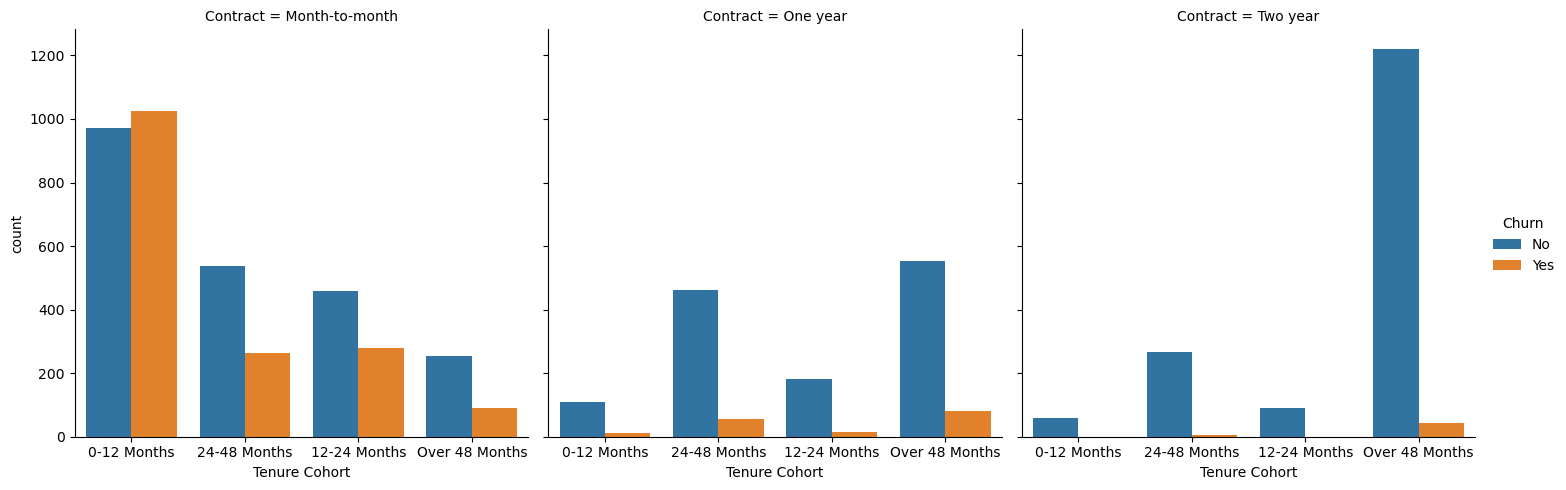

In [381]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count');

-----

# Часть 4: Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг. При желании Вы можете дополнительно попробовать любые другие модели машинного обучения с учителем (supervised learning models) и сравнить результаты!**


## Одно дерево решений (Decision Tree)

**Задание: Разделите все данные на признаки X и целевую переменную Y. Создайте дамми-переменные, где это необходимо, а также посмотрите, есть ли какие-то признаки, которые можно было бы удалить.**

In [537]:
X = pd.get_dummies(df.drop(['Churn', 'customerID'], axis=1), drop_first=True)

In [539]:
y = df['Churn']

**Задание: Выполните разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [541]:
from sklearn.model_selection import train_test_split

In [543]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Задание: Постройте модель Decision Tree и оцените её работу. Для этого выполните следующие шаги:**
   1. Обучите модель дерева решений (при желании можете выполнить поиск по сетке для поиска оптимальных значений гиперпараметров).
   2. Оцените метрики работы модели дерева решений - для этого выведите отчёт "classification report" и нарисуйте график с матрицей ошибок (confusion matrix).
   2. Посмотрите на важности признаков для получившегося дерева решений.
   4. Опционально: Нарисуйте график получившегося дерева. Обратите внимание, что если дерево получилось очень большим и Вы не выполняли усечение дерева с помощью параметров, то вызов метода plot_tree может привести к ошибке.

In [545]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [547]:
param_grid = {'max_depth': range(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)})

In [549]:
best_max_depth = grid_search.best_params_['max_depth']

In [551]:
decision_tree_model = DecisionTreeClassifier(max_depth=best_max_depth)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [553]:
y_pred = decision_tree_model.predict(X_test)

In [555]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [557]:
cm = confusion_matrix(y_test,y_pred)

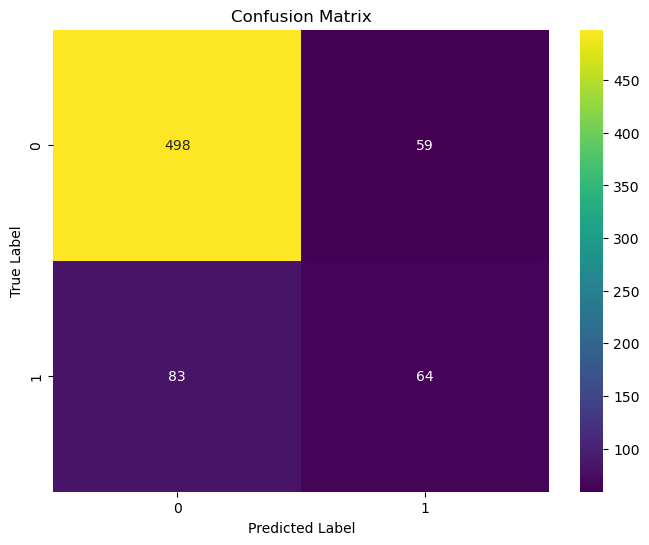

In [559]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis');

# Добавляем названия
plt.title('Confusion Matrix');
plt.ylabel('True Label');
plt.xlabel('Predicted Label');

In [577]:
importance_series = pd.DataFrame({'Value': decision_tree_model.feature_importances_}, index=X.columns).sort_values(by='Value')
importance_series = importance_series[importance_series['Value'] > 0.01]

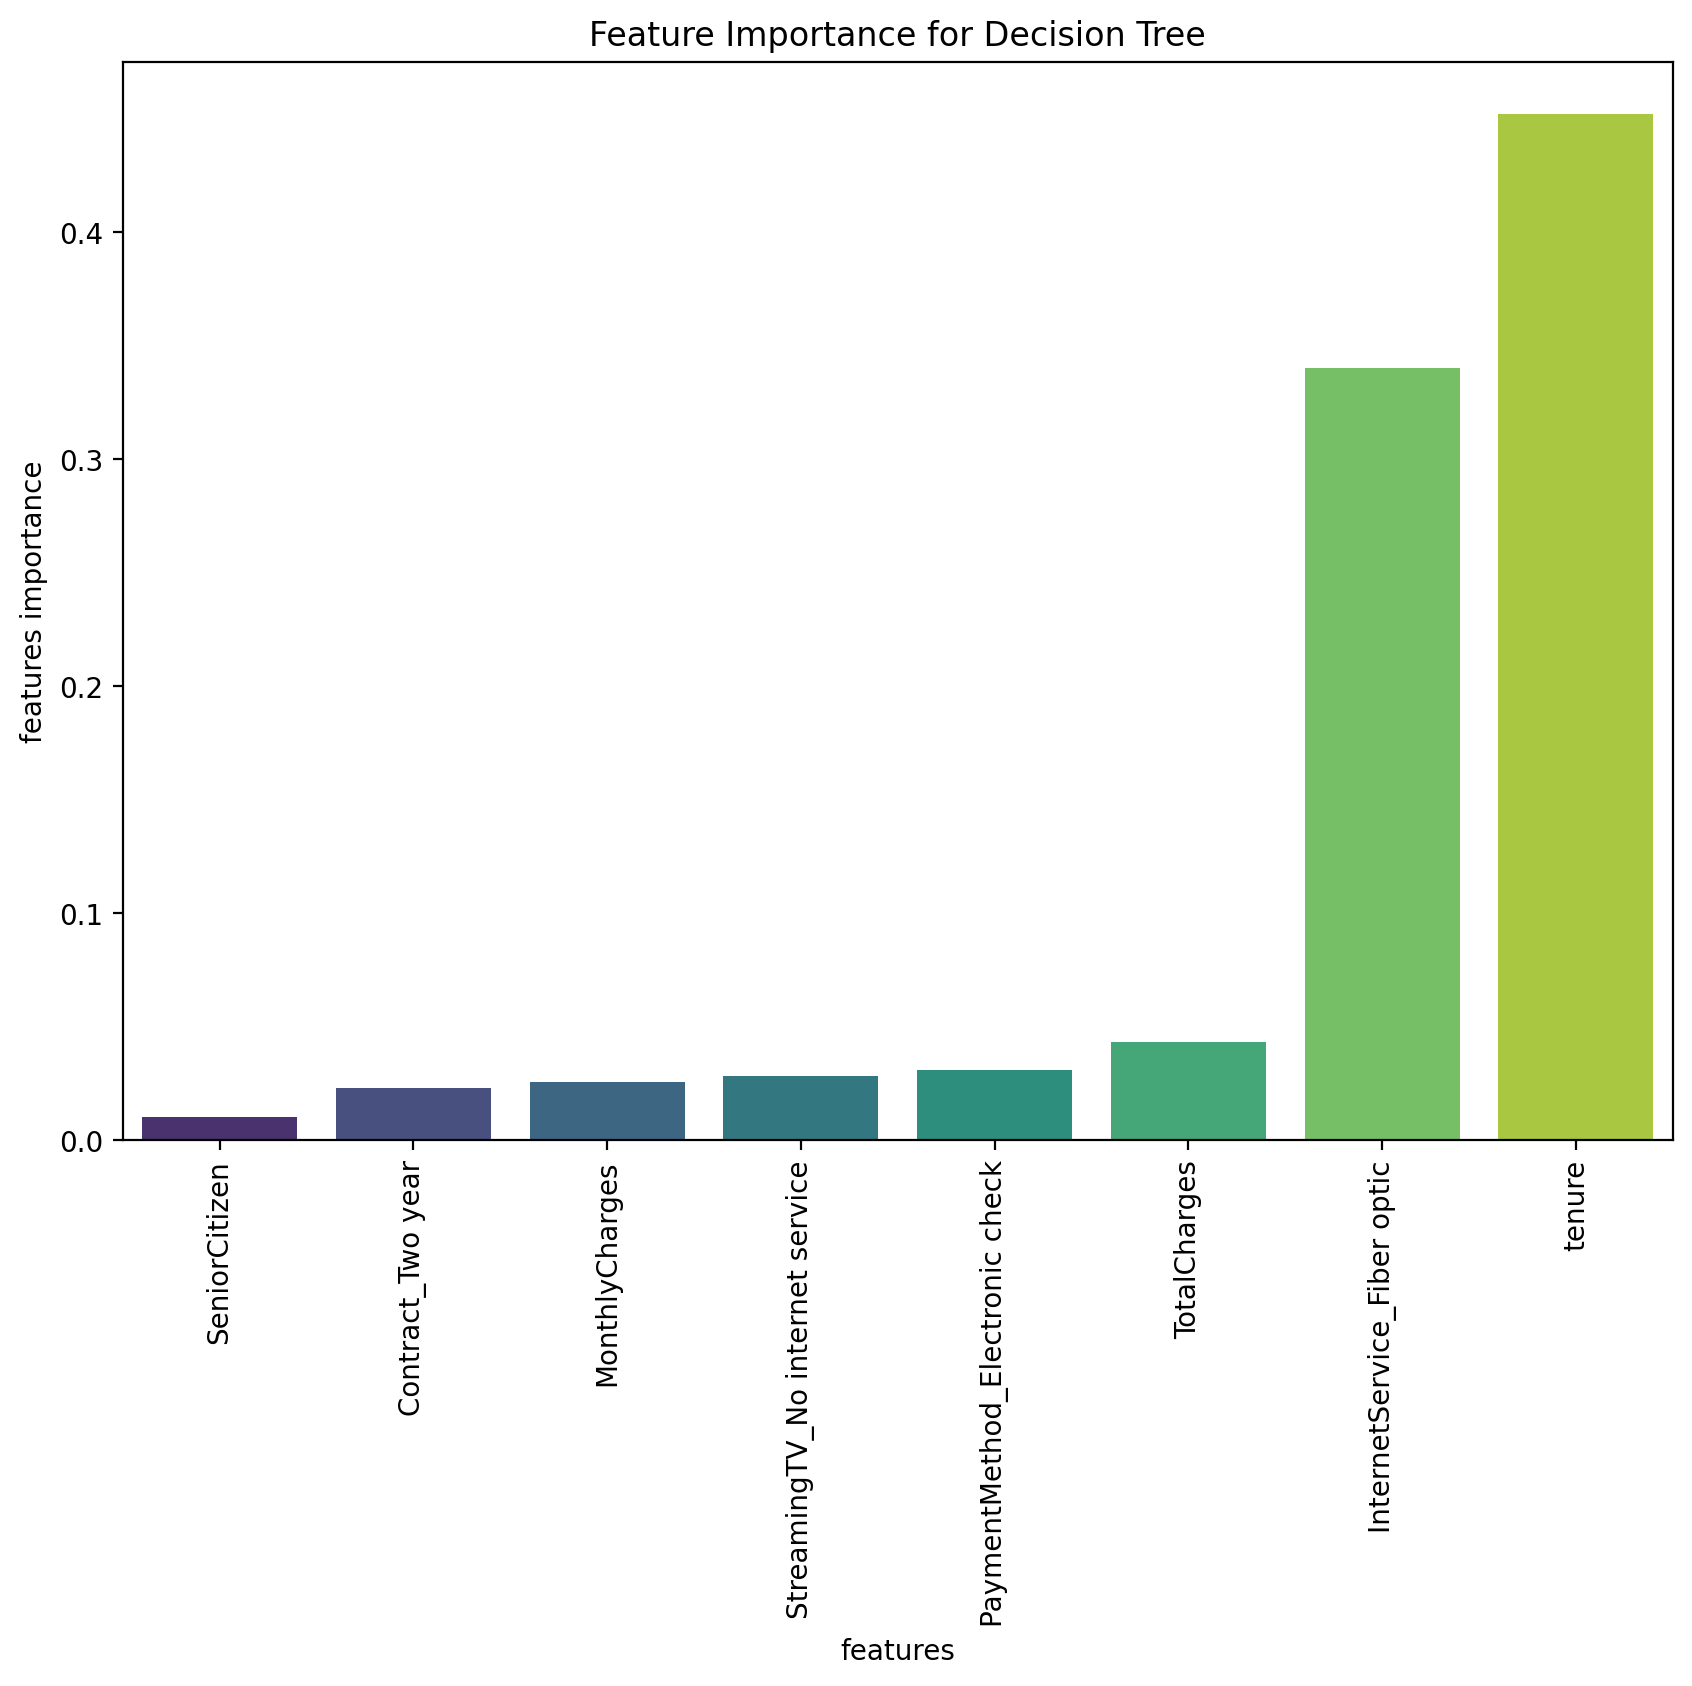

In [591]:
plt.figure(figsize=(10,7), dpi=200)
sns.barplot(data=importance_series, x=importance_series.index, y=importance_series.Value, hue=importance_series.index, palette='viridis')
plt.title('Feature Importance for Decision Tree')
plt.xlabel('features')
plt.ylabel('features importance')
plt.xticks(rotation=90);

In [593]:
from sklearn.tree import plot_tree

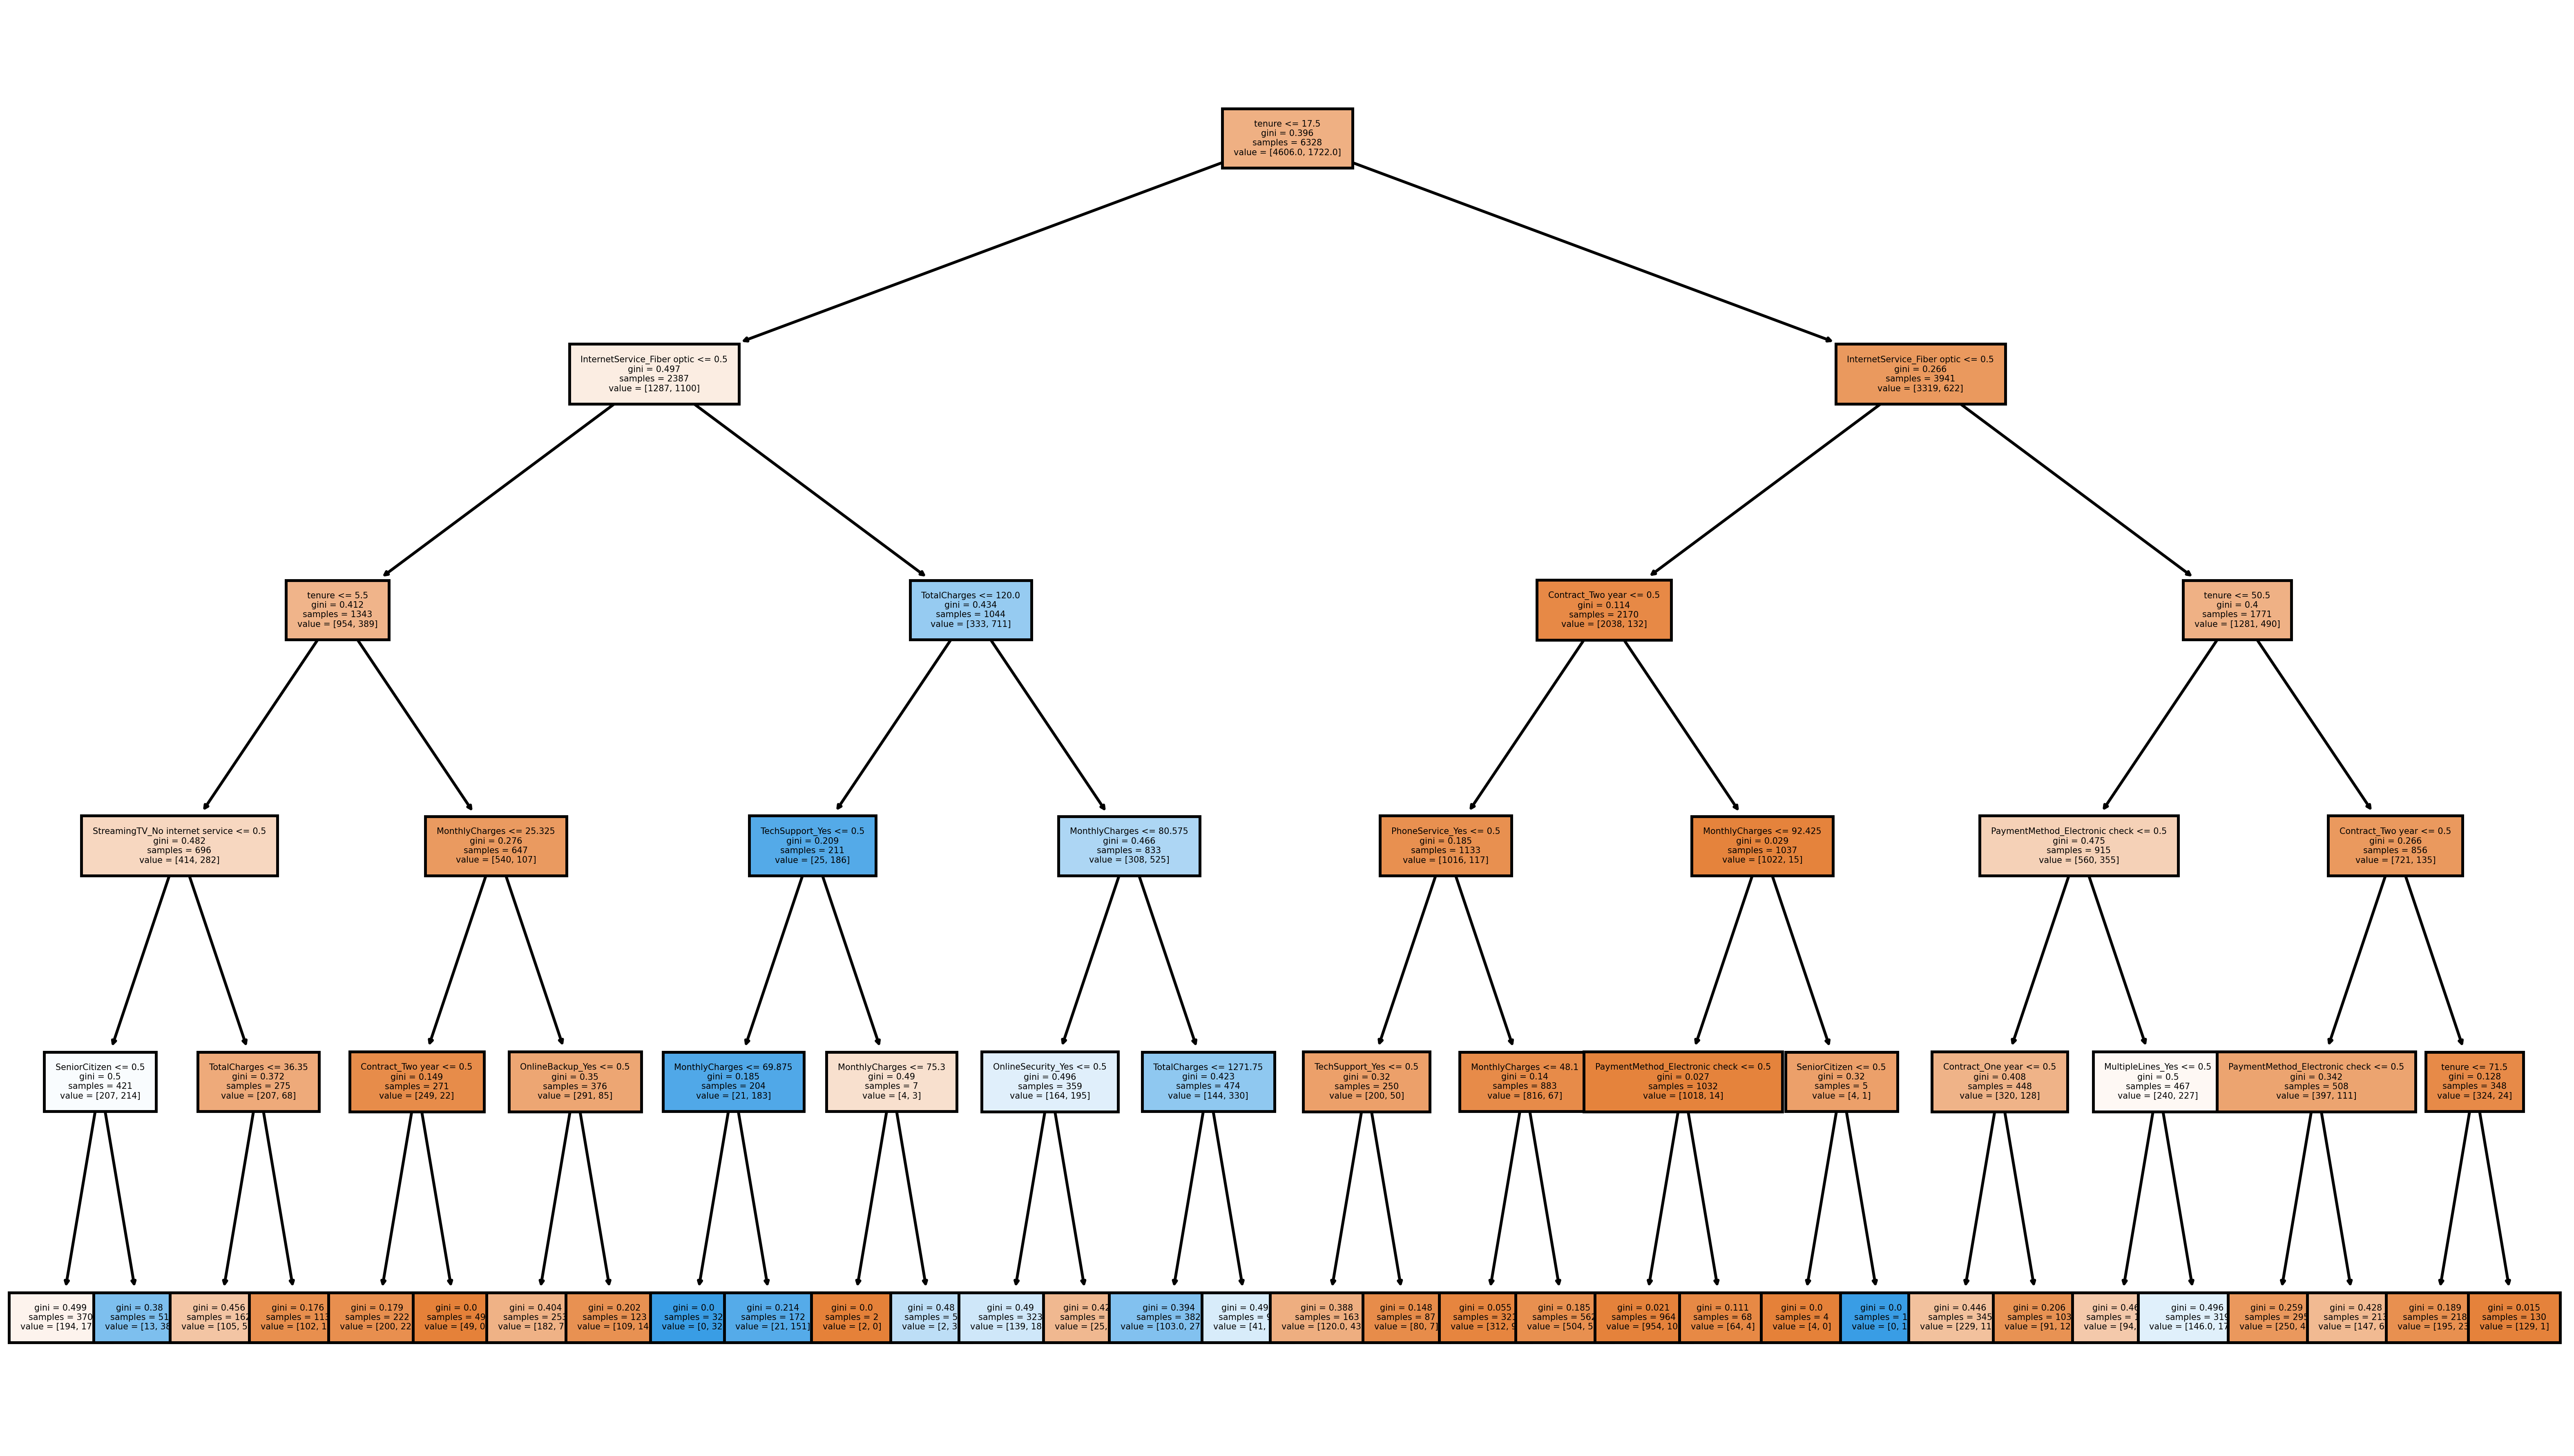

In [603]:
plt.figure(figsize=(16,9),dpi=500)
plot_tree(decision_tree_model,filled=True,feature_names=X.columns,fontsize=3);

## Случайный лес (Random Forest)

**Задание: Создайте модель случайного леса, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [625]:
from sklearn.model_selection import RandomizedSearchCV

In [627]:
param_grid = {'n_estimators': range(50, 150, 30),
             'max_depth': range(1, 6)}

In [633]:
random_model = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, n_iter=500, cv=5, scoring='accuracy')

In [635]:
random_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 20 is smaller than n_iter=500. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=500,
                   param_distributions={'max_depth': range(1, 6),
                                        'n_estimators': range(50, 150, 30)},
                   scoring='accuracy')

In [661]:
random_model.best_params_

{'n_estimators': 50, 'max_depth': 5}

In [639]:
final_random_model = RandomForestClassifier(**random_model.best_params_)

In [641]:
final_random_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [657]:
y_pred = final_random_model.predict(X_test)

In [647]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.94      0.89       557
         Yes       0.62      0.39      0.48       147

    accuracy                           0.82       704
   macro avg       0.74      0.66      0.69       704
weighted avg       0.80      0.82      0.81       704



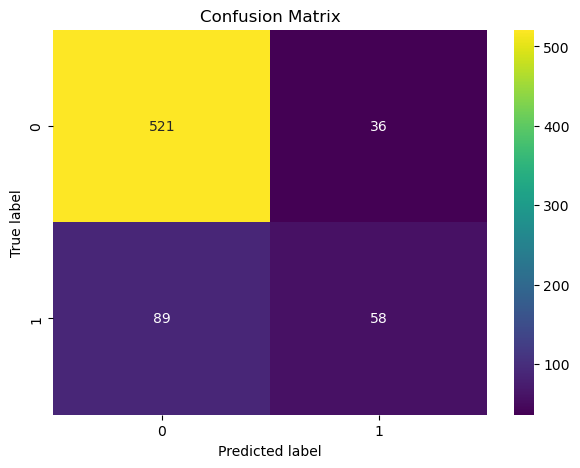

In [651]:
plt.figure(figsize=(7, 5), dpi=100)
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label');

## Расширяемые деревья (Boosted Trees)

**Задание: Создайте модель AdaBoost или Gradient Boosting, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [655]:
from sklearn.ensemble import AdaBoostClassifier

In [689]:
param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=6)],
    'n_estimators': [120, 150, 180, 210],
    'learning_rate': [0.005, 0.01, 0.02]
}

In [691]:
grid_model = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, cv=5)

In [699]:
grid_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramDa

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=4),
                                       DecisionTreeClassifier(max_depth=5),
                                       DecisionTreeClassifier(max_depth=6)],
                         'learning_rate': [0.005, 0.01, 0.02],
                         'n_estimators': [120, 150, 180, 210]})

In [701]:
best_params = grid_model.best_params_
best_params

{'estimator': DecisionTreeClassifier(max_depth=4),
 'learning_rate': 0.01,
 'n_estimators': 180}

In [703]:
final_adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), learning_rate=0.01, n_estimators=180)

In [707]:
final_adaboost_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=180)

In [709]:
y_pred = final_adaboost_model.predict(X_test)

In [711]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.59      0.45      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



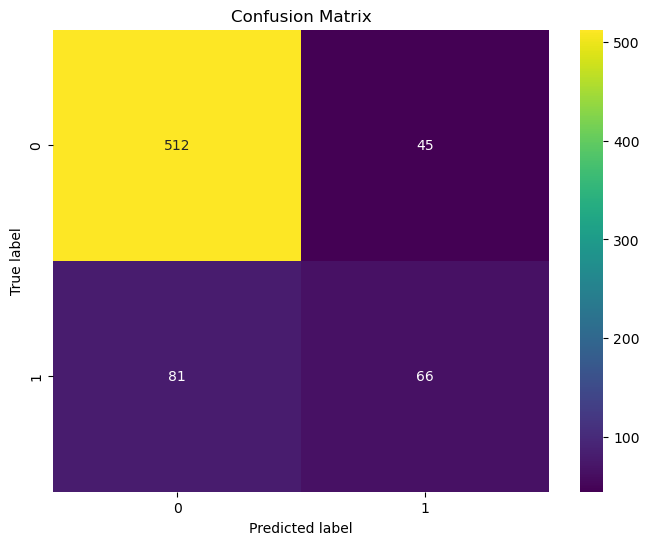

In [717]:
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label');

**Задания: Сравнивая результаты, какая модель у Вас работает лучше других?**

In [725]:
# Наилучшие результаты в модели AdaBoostClassifier, однако стоит сказать, что бралось мало параметров по сетке grid search,
# и в целом все модели показывали похожие результаты

### Отличная работа!

In [ ]:
# Ура!